In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("database.csv")
data.head()

C:\Users\mehul\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [8]:
#Task 1 - Analysis pipeline

columns = ['Vehicle ID','Year','Make', 'Model','Fuel Type', 'Fuel Type 1', 'Electric Motor', "Annual Fuel Cost (FT1)", "Annual Consumption in Barrels (FT1)" ] #Names of columns used for the analysis
df1= data.loc[:,columns] #.loc keeps those columns and the data in those columns as a new dataset in df1
df1

,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824
...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308
38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273
38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870
38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550


In [9]:
df1=df1.dropna(subset=['Vehicle ID','Year','Make','Fuel Type','Fuel Type 1', "Annual Fuel Cost (FT1)", "Annual Consumption in Barrels (FT1)"])  #drops rows with missing values
df1

,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824
...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308
38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273
38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870
38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550


In [10]:
df1 = df1.reset_index() #Resets the index 
df1

,index,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
0,0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
1,1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
2,2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
3,3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
4,4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824
...,...,...,...,...,...,...,...,...,...,...
38108,38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308
38109,38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273
38110,38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870
38111,38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550


In [11]:
df1= df1.drop(columns=['index']) #Gets rid of the index label
df1

,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824
...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308
38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273
38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870
38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550


In [12]:
df1.describe(include=[np.number]) #numerical description

,Vehicle ID,Year,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
count,38113.000000,38113.000000,38113.000000,38113.000000
mean,19170.638496,2000.194527,1970.675360,17.517635
std,11134.878665,10.464573,532.555234,4.577019
min,1.000000,1984.000000,500.000000,0.060000
25%,9529.000000,1991.000000,1600.000000,14.330870
50%,19058.000000,2001.000000,1950.000000,17.347895
75%,28779.000000,2009.000000,2350.000000,20.600625
max,38542.000000,2017.000000,6050.000000,47.087143


In [13]:
df1.describe(exclude=[np.number]) #categorical desciption

,Make,Model,Fuel Type,Fuel Type 1,Electric Motor
count,38113,38113,38113,38113,604
unique,133,3748,14,6,119
top,Chevrolet,F150 Pickup 2WD,Regular,Regular Gasoline,288V Ni-MH
freq,3810,209,25258,26531,117


In [21]:
df1["Cost normalised with consumption"] = df1["Annual Fuel Cost (FT1)"]/df1["Annual Consumption in Barrels (FT1)"] #creates a new column with values that represent fuel cost per 1 barrel
df1 #checks cost per unit consumption

,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Cost normalised with consuption,Cost normalised with consumption
0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500,106.186099,106.186099
1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500,106.186099,106.186099
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714,105.124238,105.124238
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714,105.124238,105.124238
4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824,105.731015,105.731015
...,...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308,106.489488,106.489488
38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273,126.816541,126.816541
38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870,129.091957,129.091957
38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550,196.473870,196.473870


In [6]:
sns.set_theme(style="whitegrid", font_scale=1, bin=30)

TypeError: set_theme() got an unexpected keyword argument 'bin'

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


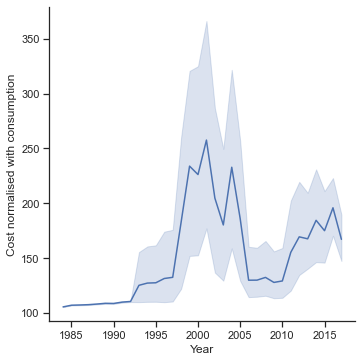

In [33]:


sns.relplot('Year', 'Cost normalised with consumption', data=df1,kind='line')


C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


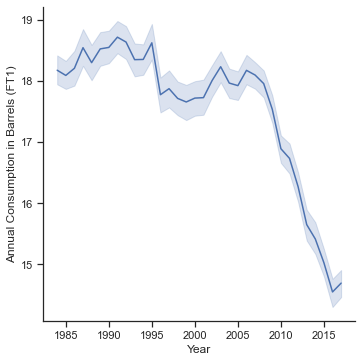

In [34]:
sns.relplot('Year', 'Annual Consumption in Barrels (FT1)', data=df1,kind='line')

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


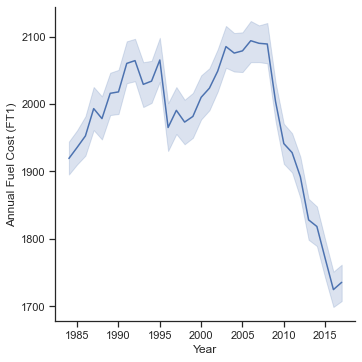

In [35]:
sns.relplot('Year', 'Annual Fuel Cost (FT1)', data=df1,kind='line')

In [36]:
#Analysis

From the figures, we are trying to desern a relationship between a cost of consumption and unit barrels of consumptions between gas and electric cars. 


SyntaxError: invalid syntax (Temp/ipykernel_19640/4064286430.py, line 3)

In [47]:
rq2= df1.drop(columns=['Vehicle ID','Make', 'Model', 'Fuel Type 1', 'Electric Motor', "Annual Fuel Cost (FT1)", "Annual Consumption in Barrels (FT1)"])

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


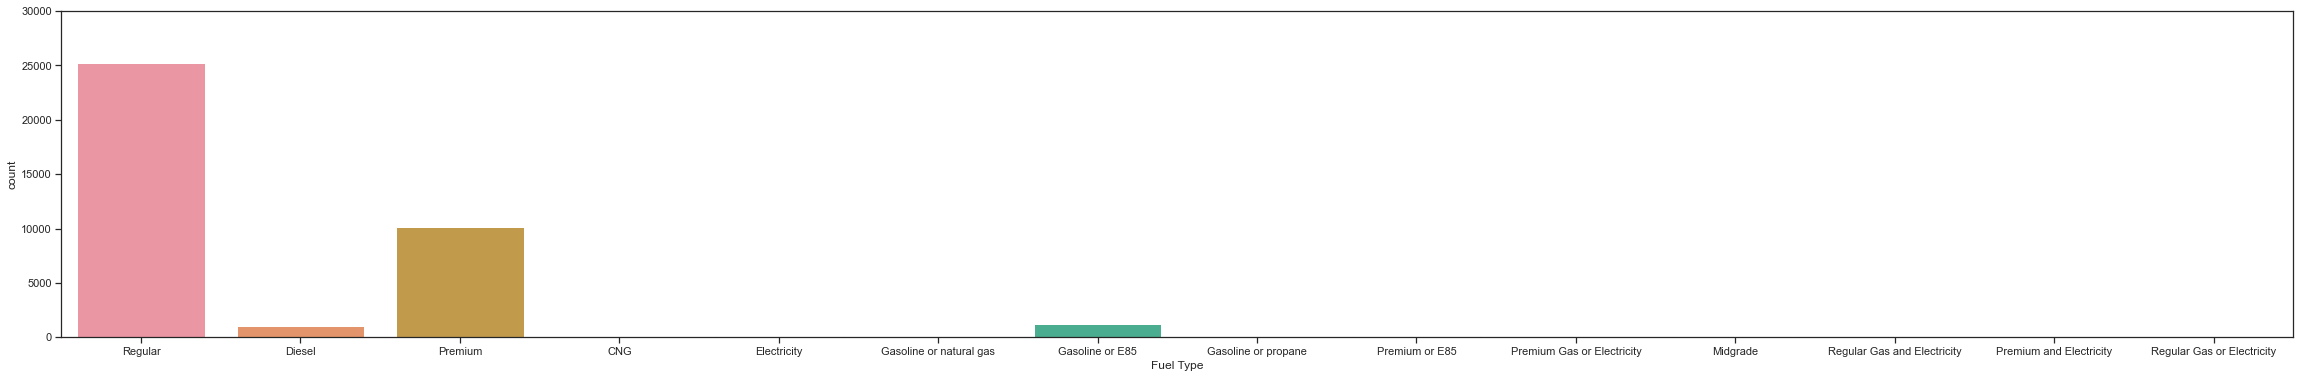

In [66]:
fig_dims = (40, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot("Fuel Type", ax=ax, data=df1)
ax.set(ylim=(0, 30000))
plt.show()

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


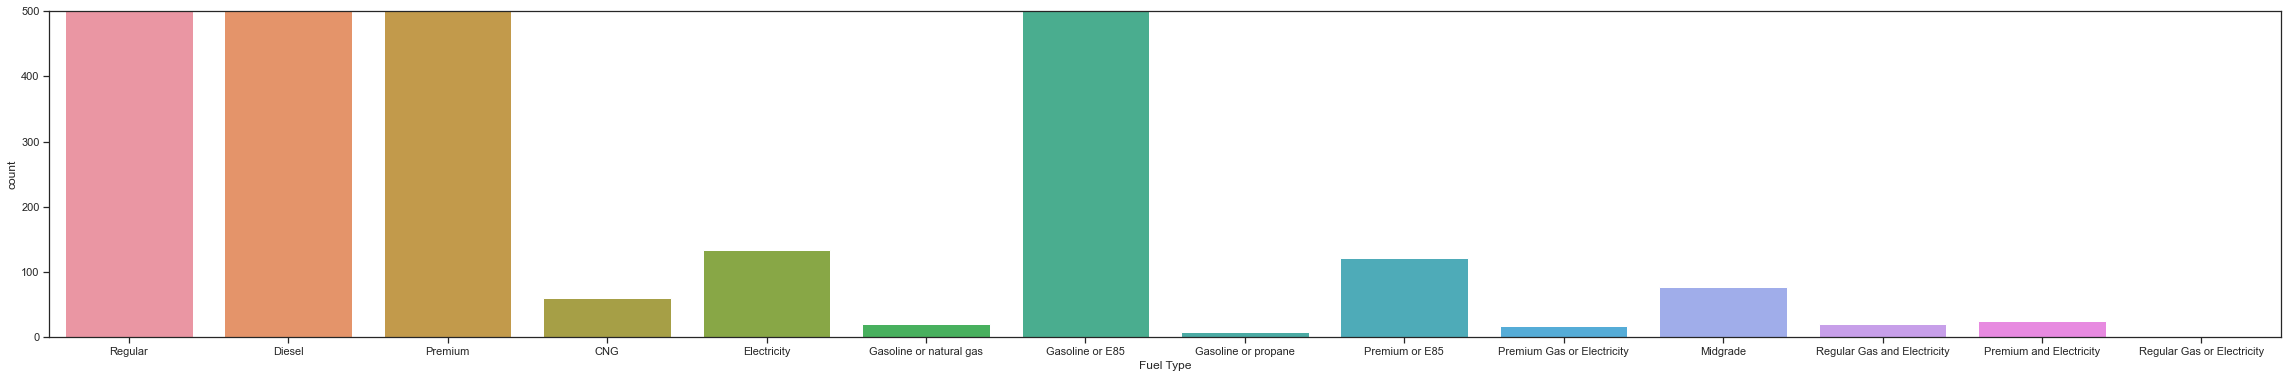

In [67]:
fig, ay = plt.subplots(figsize=fig_dims)
ay = sns.countplot("Fuel Type", ax=ay, data=df1)
ay.set(ylim=(0, 500))
plt.show()


We can see from the figure that over the span of the last 5 years, the normalised cost of fuel with one unit barrel has increased. We can also observe that this increase has occured after a increase in frequency of electric powered vehicles. This may suggest that increases in fuel efficieny may have been in direct relation to the rise in popularity of electric vehicles.

In [118]:
fuelyr = df1.groupby(['Year','Fuel Type']).size().reset_index()

fuelyr.head(100)
#fig, az = plt.subplots(figsize=fig_dims)
#sns.lineplot(x="Year", y="Fuel Type", ax=az, data=fuelyr)


,Year,Fuel Type,0
0,1984,Diesel,262
1,1984,Regular,1702
2,1985,Diesel,158
3,1985,Premium,101
4,1985,Regular,1442
...,...,...,...
95,2005,CNG,5
96,2005,Diesel,14
97,2005,Gasoline or E85,40
98,2005,Premium,464
